In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

In [2]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 2/5
235/235 [==============================] - 3s 15ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 4/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6917 - val_loss: 0.6917
Epoch 5/5
235/235 [==============================] - 3s 15ms/step - loss: 0.6916 - val_loss: 0.6916


In [6]:
prediction = autoencoder.predict(x_test)

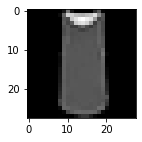

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 2))
plt.imshow(x_train[2].reshape(28,28))
plt.gray()
plt.show()

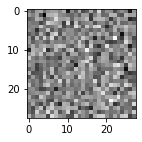

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 2))
plt.imshow(prediction[2].reshape(28,28))
plt.gray()
plt.show()